In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv('podcast_dataset.csv')

In [148]:
df.head()

,video_id,title,published_at,view_count,like_count,comment_count,duration,hours,minutes,seconds,podcast,total_seconds,duration_minutes,is_short_strict
0,zt5uqErQysk,The $4 Trillion GDP Is a Lie? | Why Our $4 Tri...,2025-10-01T12:31:17Z,451185,11351,1475,PT1H28M4S,1,28,4,Yes,5284,88.066667,False
1,ockrdZal5fA,@OpenAI VP on How AI Will Redefine Work ft. Sr...,2025-07-31T14:30:39Z,280004,4525,226,PT1H1M9S,1,1,9,Yes,3669,61.150000,False
2,gLeMTK3PeC8,10X Your BUSINESS and Build POWERFUL Career: K...,2025-07-26T12:40:02Z,335307,7218,365,PT1H32M15S,1,32,15,Yes,5535,92.250000,False
3,i_Y-yBW7kCU,Dark Truth of Gurgaon Real Estate Ft. Vishal B...,2025-07-21T12:30:50Z,499452,7148,1113,PT2H1M37S,2,1,37,Yes,7297,121.616667,False
4,xwFgddaaBXs,Ex-Facebook & Uber Heads Reveal 9 SIMPLE HABIT...,2025-07-11T12:45:07Z,305185,6062,197,PT1H56M18S,1,56,18,Yes,6978,116.300000,False


### Dropping columns

In [149]:
df = df.drop(columns=['video_id', 'duration', 'podcast', 'is_short_strict'])

In [150]:
df.head()

,title,published_at,view_count,like_count,comment_count,hours,minutes,seconds,total_seconds,duration_minutes
0,The $4 Trillion GDP Is a Lie? | Why Our $4 Tri...,2025-10-01T12:31:17Z,451185,11351,1475,1,28,4,5284,88.066667
1,@OpenAI VP on How AI Will Redefine Work ft. Sr...,2025-07-31T14:30:39Z,280004,4525,226,1,1,9,3669,61.150000
2,10X Your BUSINESS and Build POWERFUL Career: K...,2025-07-26T12:40:02Z,335307,7218,365,1,32,15,5535,92.250000
3,Dark Truth of Gurgaon Real Estate Ft. Vishal B...,2025-07-21T12:30:50Z,499452,7148,1113,2,1,37,7297,121.616667
4,Ex-Facebook & Uber Heads Reveal 9 SIMPLE HABIT...,2025-07-11T12:45:07Z,305185,6062,197,1,56,18,6978,116.300000


In [151]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['published_date'] = df['published_at'].dt.date

In [152]:
df.head()

,title,published_at,view_count,like_count,comment_count,hours,minutes,seconds,total_seconds,duration_minutes,published_date
0,The $4 Trillion GDP Is a Lie? | Why Our $4 Tri...,2025-10-01 12:31:17+00:00,451185,11351,1475,1,28,4,5284,88.066667,2025-10-01
1,@OpenAI VP on How AI Will Redefine Work ft. Sr...,2025-07-31 14:30:39+00:00,280004,4525,226,1,1,9,3669,61.150000,2025-07-31
2,10X Your BUSINESS and Build POWERFUL Career: K...,2025-07-26 12:40:02+00:00,335307,7218,365,1,32,15,5535,92.250000,2025-07-26
3,Dark Truth of Gurgaon Real Estate Ft. Vishal B...,2025-07-21 12:30:50+00:00,499452,7148,1113,2,1,37,7297,121.616667,2025-07-21
4,Ex-Facebook & Uber Heads Reveal 9 SIMPLE HABIT...,2025-07-11 12:45:07+00:00,305185,6062,197,1,56,18,6978,116.300000,2025-07-11


In [153]:
df = df.drop(columns=['published_at'])

In [154]:
df.head()

,title,view_count,like_count,comment_count,hours,minutes,seconds,total_seconds,duration_minutes,published_date
0,The $4 Trillion GDP Is a Lie? | Why Our $4 Tri...,451185,11351,1475,1,28,4,5284,88.066667,2025-10-01
1,@OpenAI VP on How AI Will Redefine Work ft. Sr...,280004,4525,226,1,1,9,3669,61.150000,2025-07-31
2,10X Your BUSINESS and Build POWERFUL Career: K...,335307,7218,365,1,32,15,5535,92.250000,2025-07-26
3,Dark Truth of Gurgaon Real Estate Ft. Vishal B...,499452,7148,1113,2,1,37,7297,121.616667,2025-07-21
4,Ex-Facebook & Uber Heads Reveal 9 SIMPLE HABIT...,305185,6062,197,1,56,18,6978,116.300000,2025-07-11


In [155]:
df.shape

(16, 10)

## Visualising the dataset

### How the total duration is impacting the likes count?

In [156]:
df['total_seconds'].max()

np.int64(10217)

In [157]:
bins = [3600, 5400, 7200, 9000, 10800, 12600]
labels = ['Upto 1 hour 30 minutes', 'Upto 2 hours', 'Upto 2 hours 30 minutes', 'Upto 3 hours', 'Upto 3 hours 30 minutes']
print(f'Bins length: {len(bins)}, Labels length: {len(labels)}')

Bins length: 6, Labels length: 5


In [158]:
df['duration_bin'] = pd.cut(df['total_seconds'], bins=bins, labels=labels, include_lowest=True)

In [159]:
duration_stats = df.groupby('duration_bin').agg(
    avg_views=('view_count', 'mean'),
    avg_likes=('like_count', 'mean'),
    avg_comments=('comment_count', 'mean'),
    count=('title', 'count')
).reset_index()


/var/folders/xw/nxfdfyv90zb7rd21t5fxd6000000gn/T/ipykernel_21180/2964472464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_stats = df.groupby('duration_bin').agg(


In [160]:
duration_stats

,duration_bin,avg_views,avg_likes,avg_comments,count
0,Upto 1 hour 30 minutes,560051.750000,9950.0,858.500000,4
1,Upto 2 hours,595837.800000,11231.0,453.800000,5
2,Upto 2 hours 30 minutes,417907.750000,6650.5,563.750000,4
3,Upto 3 hours,415901.666667,7756.0,709.666667,3
4,Upto 3 hours 30 minutes,NaN,NaN,NaN,0


In [161]:
duration_stats['avg_views'] = duration_stats['avg_views'].round(-2)

In [162]:
duration_stats['avg_comments'] = duration_stats['avg_comments'].round(-2)

In [163]:
def format_indian(num):
    return f"{num:,.0f}".replace(",", "_") \
                       .replace("_", ",", 1) \
                       .replace("_", ",")

In [164]:
duration_stats['avg_views'] = duration_stats['avg_views'].round(-2)
duration_stats['avg_views'] = duration_stats['avg_views'].apply(format_indian)

In [165]:
duration_stats

,duration_bin,avg_views,avg_likes,avg_comments,count
0,Upto 1 hour 30 minutes,"560,100",9950.0,900.0,4
1,Upto 2 hours,"595,800",11231.0,500.0,5
2,Upto 2 hours 30 minutes,"417,900",6650.5,600.0,4
3,Upto 3 hours,"415,900",7756.0,700.0,3
4,Upto 3 hours 30 minutes,nan,NaN,NaN,0


In [166]:
duration_stats['avg_likes'] = duration_stats['avg_likes'].round(-2).apply(format_indian)

In [167]:
duration_stats

,duration_bin,avg_views,avg_likes,avg_comments,count
0,Upto 1 hour 30 minutes,"560,100","10,000",900.0,4
1,Upto 2 hours,"595,800","11,200",500.0,5
2,Upto 2 hours 30 minutes,"417,900","6,700",600.0,4
3,Upto 3 hours,"415,900","7,800",700.0,3
4,Upto 3 hours 30 minutes,nan,nan,NaN,0


In [168]:
duration_stats = duration_stats.dropna()

In [169]:
duration_stats

,duration_bin,avg_views,avg_likes,avg_comments,count
0,Upto 1 hour 30 minutes,"560,100","10,000",900.0,4
1,Upto 2 hours,"595,800","11,200",500.0,5
2,Upto 2 hours 30 minutes,"417,900","6,700",600.0,4
3,Upto 3 hours,"415,900","7,800",700.0,3


### Duration bin vs Average Views

/var/folders/xw/nxfdfyv90zb7rd21t5fxd6000000gn/T/ipykernel_21180/3310016016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_stats['avg_views'] = (
/var/folders/xw/nxfdfyv90zb7rd21t5fxd6000000gn/T/ipykernel_21180/3310016016.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_stats['avg_views'] = duration_stats['avg_views'].round(-2)


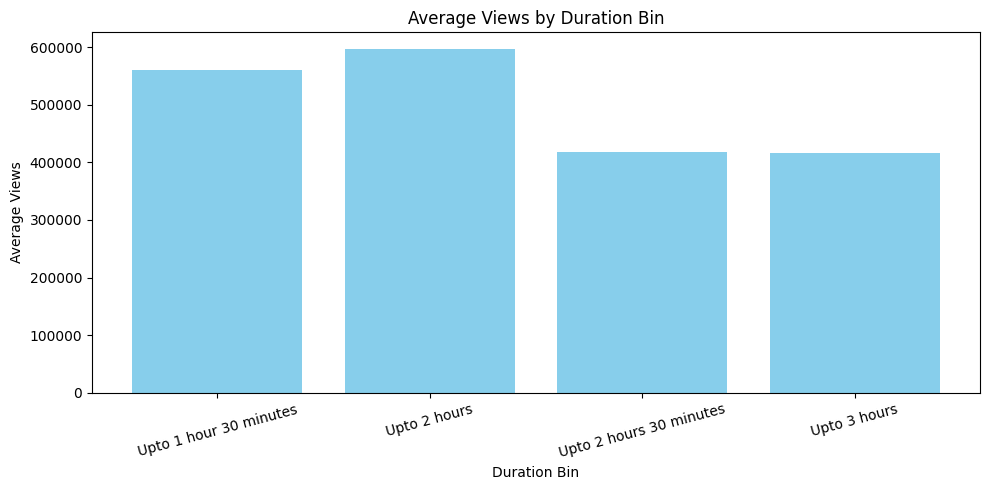

In [170]:
duration_stats['avg_views'] = (
    duration_stats['avg_views']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)    
    .replace('', '0')                          
    .astype(float)
)

duration_stats['avg_views'] = duration_stats['avg_views'].round(-2)

def format_indian(num):
    num = int(num)
    s = str(num)[::-1]
    parts = []
    parts.append(s[:3])
    s = s[3:]
    while s:
        parts.append(s[:2])
        s = s[2:]
    return ",".join(parts)[::-1]


plt.figure(figsize=(10,5))
bars = plt.bar(duration_stats['duration_bin'].astype(str),
               duration_stats['avg_views'],
               color='skyblue')
plt.title("Average Views by Duration Bin")
plt.xlabel("Duration Bin")
plt.ylabel("Average Views")
plt.xticks(rotation=15)
plt.tight_layout()

### Duration bin vs Average likes

In [171]:
duration_stats['avg_likes_num'] = (
    duration_stats['avg_likes']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)    
    .replace('', '0')                          
    .astype(float)
)

/var/folders/xw/nxfdfyv90zb7rd21t5fxd6000000gn/T/ipykernel_21180/2391460145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_stats['avg_likes_num'] = (


In [172]:
duration_stats['avg_likes_num'] = duration_stats['avg_likes_num'].round(-2)

/var/folders/xw/nxfdfyv90zb7rd21t5fxd6000000gn/T/ipykernel_21180/3483248326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_stats['avg_likes_num'] = duration_stats['avg_likes_num'].round(-2)


In [173]:
def format_indian(num):
    num = int(num)
    s = str(num)[::-1]
    parts = []
    parts.append(s[:3])
    s = s[3:]
    while s:
        parts.append(s[:2])
        s = s[2:]
    return ",".join(parts)[::-1]

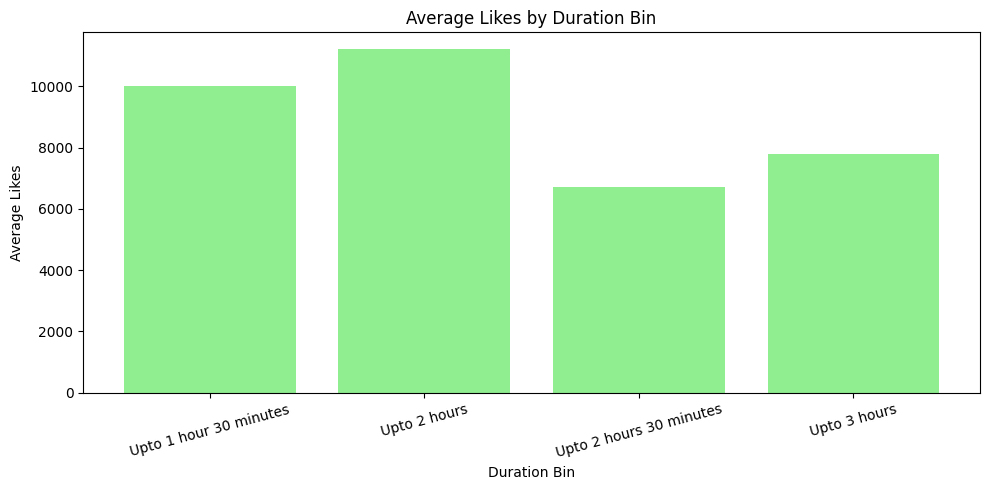

In [174]:
plt.figure(figsize=(10,5))
bars = plt.bar(duration_stats['duration_bin'].astype(str),
               duration_stats['avg_likes_num'],
               color='lightgreen')
plt.title("Average Likes by Duration Bin")
plt.xlabel("Duration Bin")
plt.ylabel("Average Likes")
plt.xticks(rotation=15)
plt.tight_layout()

In [175]:
duration_stats

,duration_bin,avg_views,avg_likes,avg_comments,count,avg_likes_num
0,Upto 1 hour 30 minutes,560100.0,"10,000",900.0,4,10000.0
1,Upto 2 hours,595800.0,"11,200",500.0,5,11200.0
2,Upto 2 hours 30 minutes,417900.0,"6,700",600.0,4,6700.0
3,Upto 3 hours,415900.0,"7,800",700.0,3,7800.0


In [176]:
duration_stats = duration_stats.drop(columns=['avg_likes'])
duration_stats = duration_stats.rename(columns={'avg_likes_num': 'avg_likes'})

In [177]:
duration_stats

,duration_bin,avg_views,avg_comments,count,avg_likes
0,Upto 1 hour 30 minutes,560100.0,900.0,4,10000.0
1,Upto 2 hours,595800.0,500.0,5,11200.0
2,Upto 2 hours 30 minutes,417900.0,600.0,4,6700.0
3,Upto 3 hours,415900.0,700.0,3,7800.0


### Count of videos in each duration bin

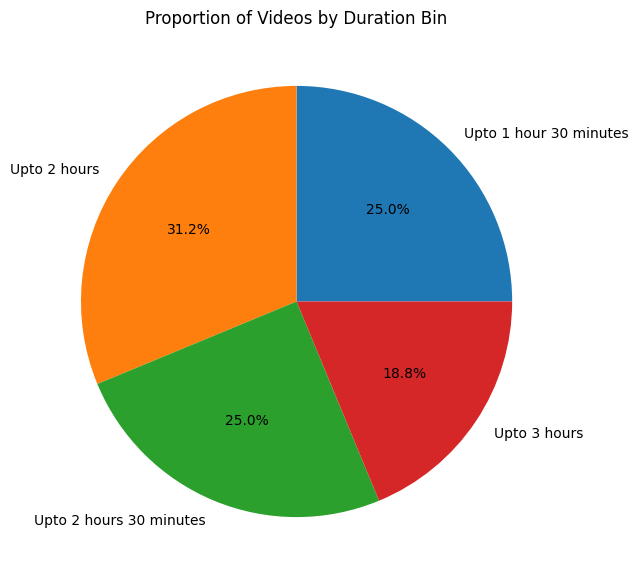

In [178]:
plt.figure(figsize=(7,7))
plt.pie(duration_stats['count'], labels=duration_stats['duration_bin'], autopct='%1.1f%%')
plt.title("Proportion of Videos by Duration Bin")
plt.show()

### Duration Bin vs Average Comment

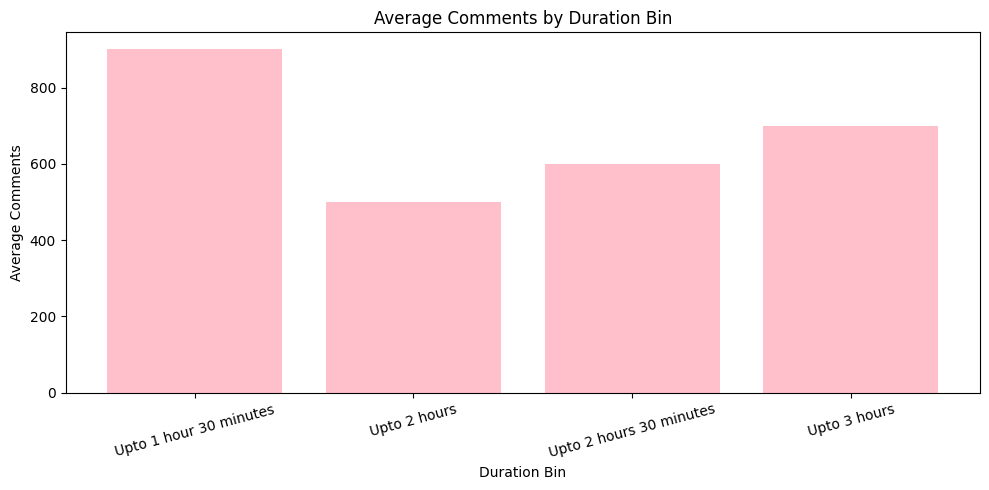

In [179]:
plt.figure(figsize=(10,5))
bars = plt.bar(duration_stats['duration_bin'].astype(str),
               duration_stats['avg_comments'],
               color='pink')
plt.title("Average Comments by Duration Bin")
plt.xlabel("Duration Bin")
plt.ylabel("Average Comments")
plt.xticks(rotation=15)
plt.tight_layout()

In [180]:
df.shape

(16, 11)

In [181]:
df.head()

,title,view_count,like_count,comment_count,hours,minutes,seconds,total_seconds,duration_minutes,published_date,duration_bin
0,The $4 Trillion GDP Is a Lie? | Why Our $4 Tri...,451185,11351,1475,1,28,4,5284,88.066667,2025-10-01,Upto 1 hour 30 minutes
1,@OpenAI VP on How AI Will Redefine Work ft. Sr...,280004,4525,226,1,1,9,3669,61.150000,2025-07-31,Upto 1 hour 30 minutes
2,10X Your BUSINESS and Build POWERFUL Career: K...,335307,7218,365,1,32,15,5535,92.250000,2025-07-26,Upto 2 hours
3,Dark Truth of Gurgaon Real Estate Ft. Vishal B...,499452,7148,1113,2,1,37,7297,121.616667,2025-07-21,Upto 2 hours 30 minutes
4,Ex-Facebook & Uber Heads Reveal 9 SIMPLE HABIT...,305185,6062,197,1,56,18,6978,116.300000,2025-07-11,Upto 2 hours


In [182]:
df['published_date'] = pd.to_datetime(df['published_date'])

df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['month_name'] = df['published_date'].dt.month_name()

In [183]:
df.head()

,title,view_count,like_count,comment_count,hours,minutes,seconds,total_seconds,duration_minutes,published_date,duration_bin,year,month,month_name
0,The $4 Trillion GDP Is a Lie? | Why Our $4 Tri...,451185,11351,1475,1,28,4,5284,88.066667,2025-10-01,Upto 1 hour 30 minutes,2025,10,October
1,@OpenAI VP on How AI Will Redefine Work ft. Sr...,280004,4525,226,1,1,9,3669,61.150000,2025-07-31,Upto 1 hour 30 minutes,2025,7,July
2,10X Your BUSINESS and Build POWERFUL Career: K...,335307,7218,365,1,32,15,5535,92.250000,2025-07-26,Upto 2 hours,2025,7,July
3,Dark Truth of Gurgaon Real Estate Ft. Vishal B...,499452,7148,1113,2,1,37,7297,121.616667,2025-07-21,Upto 2 hours 30 minutes,2025,7,July
4,Ex-Facebook & Uber Heads Reveal 9 SIMPLE HABIT...,305185,6062,197,1,56,18,6978,116.300000,2025-07-11,Upto 2 hours,2025,7,July


In [184]:
yearly_views = df.groupby('year')['view_count'].sum().reset_index()
print(yearly_views)

   year  view_count
0  2024     3590953
1  2025     4547779


In [185]:
yearly_avg = df.groupby('year')['view_count'].mean().reset_index().round(-2)
print(yearly_avg)

   year  view_count
0  2000    718200.0
1  2000    413400.0


In [186]:
monthly_views = df.groupby('month')['view_count'].sum().reset_index()
print(monthly_views)

   month  view_count
0      1     1148840
1      4      921569
2      6     1248197
3      7     1419948
4      9     1307731
5     10     1586531
6     11      505916


In [187]:
monthly_views_name = df.groupby('month_name')['view_count'].sum().reset_index()
print(monthly_views_name)

  month_name  view_count
0      April      921569
1    January     1148840
2       July     1419948
3       June     1248197
4   November      505916
5    October     1586531
6  September     1307731


### Month-wise view count

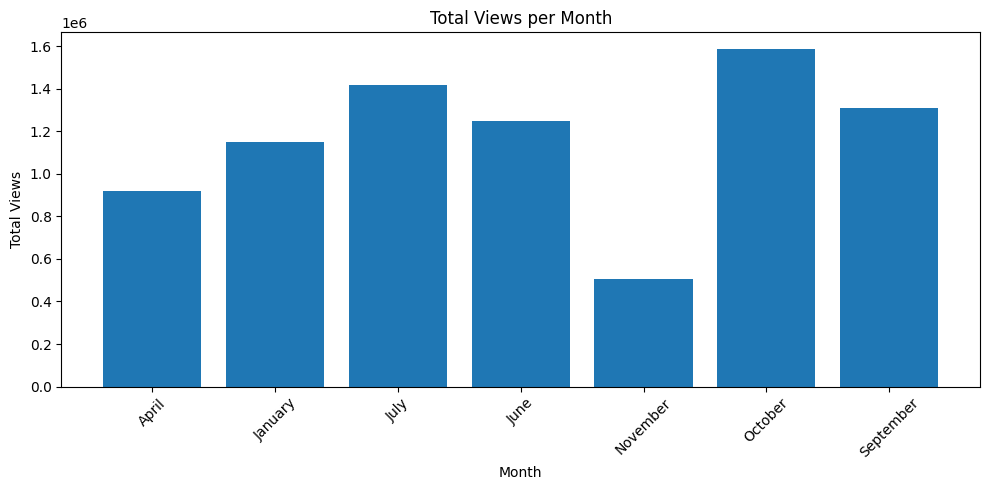

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(monthly_views_name['month_name'], monthly_views_name['view_count'])
plt.title("Total Views per Month")
plt.xlabel("Month")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Year-wise view plot

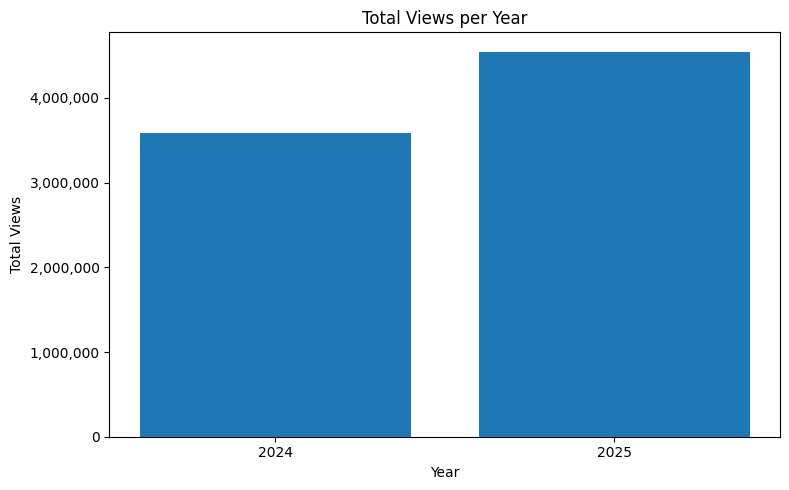

In [189]:
import matplotlib.ticker as mtick

plt.figure(figsize=(8,5))
plt.bar(yearly_views['year'].astype(str), yearly_views['view_count'])
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Total Views per Year")
plt.xlabel("Year")
plt.ylabel("Total Views")
plt.tight_layout()
plt.show()

### Year+Month wise views plot

In [190]:
df['published_date'] = pd.to_datetime(df['published_date'])

In [191]:
df['year_month'] = df['published_date'].dt.to_period('M').astype(str)

In [192]:
ym_views = df.groupby('year_month')['view_count'].sum().reset_index()

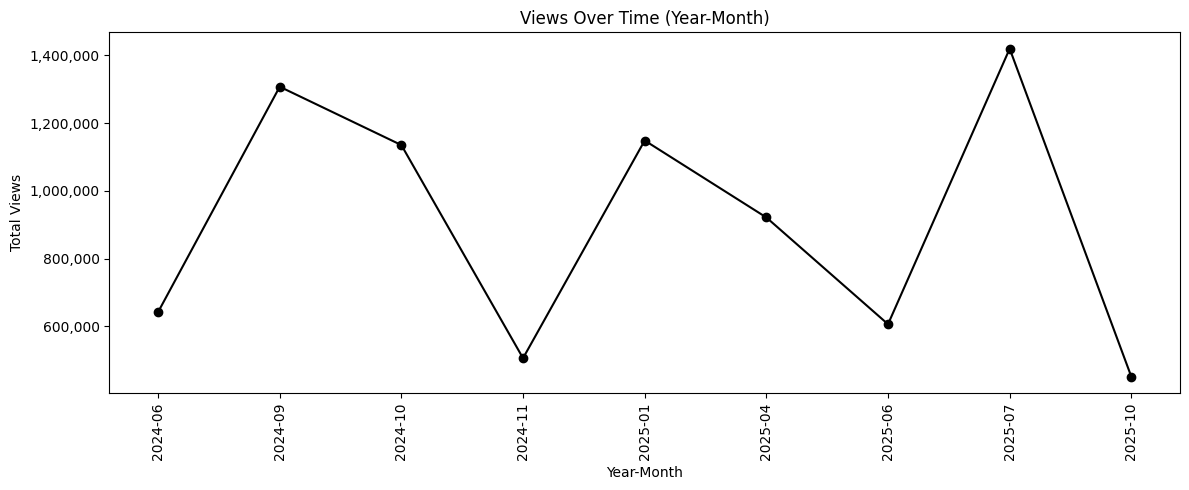

In [193]:
plt.figure(figsize=(12,5))
plt.plot(ym_views['year_month'], ym_views['view_count'], marker='o', color='black')
plt.title("Views Over Time (Year-Month)")
plt.xlabel("Year-Month")
plt.ylabel("Total Views")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Year+Month wise likes count plot

In [194]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [195]:
df['year_month'] = df['published_date'].dt.to_period('M').astype(str)

In [196]:
ym_likes = df.groupby('year_month')['like_count'].sum().reset_index()

In [197]:
ym_likes = ym_likes.sort_values('year_month').reset_index(drop=True)

In [198]:
ym_likes['likes_3mo_roll'] = ym_likes['like_count'].rolling(window=3, min_periods=1).mean()

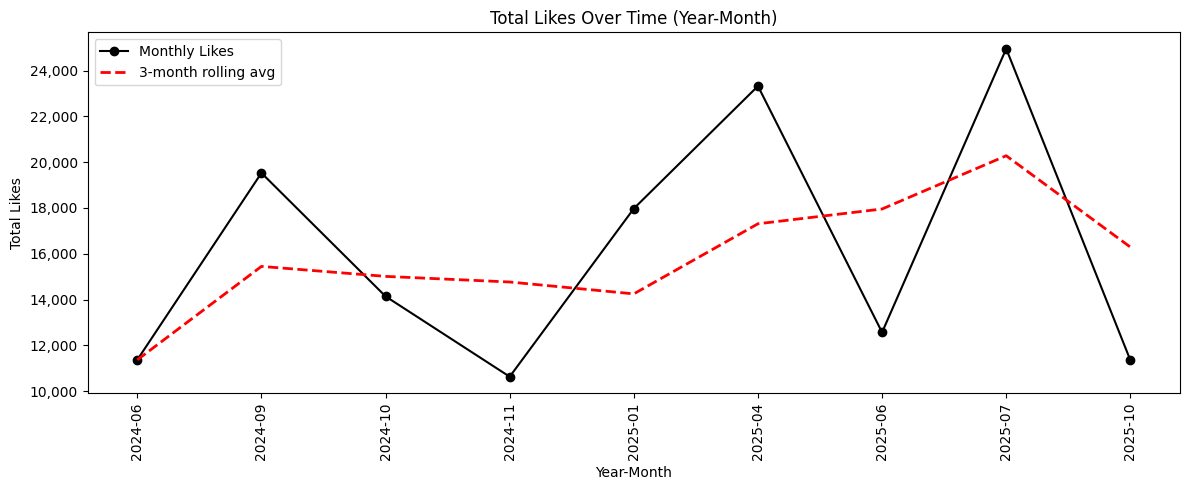

In [199]:
plt.figure(figsize=(12,5))
plt.plot(ym_likes['year_month'], ym_likes['like_count'], marker='o', label='Monthly Likes', 
         color='black')
plt.plot(ym_likes['year_month'], ym_likes['likes_3mo_roll'], marker='',
         linestyle='--', linewidth=2, label='3-month rolling avg', color='red')

plt.title('Total Likes Over Time (Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Total Likes')
plt.xticks(rotation=90)
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Average likes per video

In [200]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['year_month'] = df['published_date'].dt.to_period('M').astype(str)

In [201]:
ym_likes = df.groupby('year_month').agg(
    total_likes=('like_count', 'sum'),
    n_videos=('title', 'count')
).reset_index()

ym_likes['avg_likes_per_video'] = ym_likes['total_likes'] / ym_likes['n_videos']
ym_likes = ym_likes.sort_values('year_month')

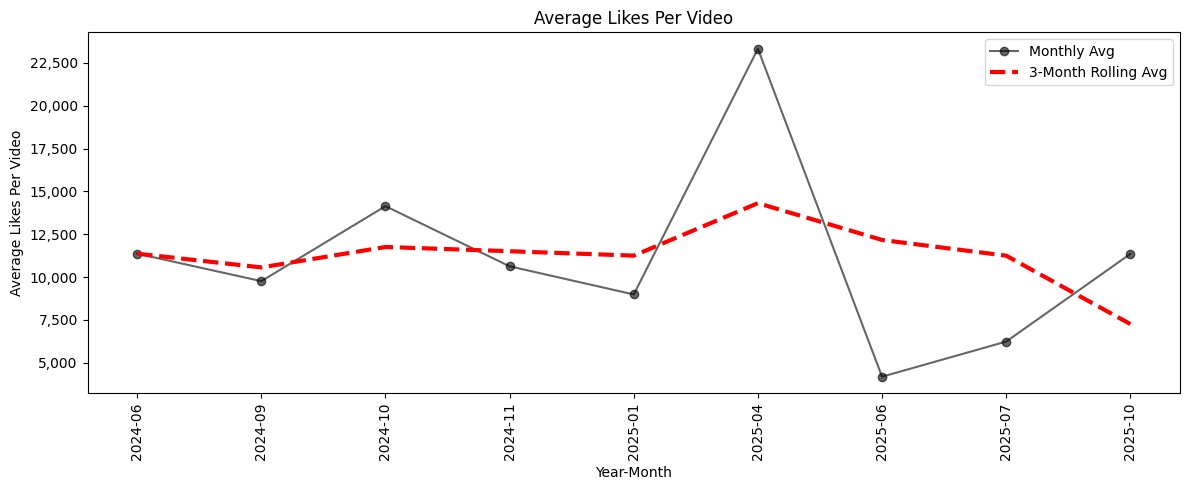

In [202]:
ym_likes['avg_3mo_roll'] = ym_likes['avg_likes_per_video'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(ym_likes['year_month'], ym_likes['avg_likes_per_video'], marker='o', alpha=0.6, label='Monthly Avg', color='black')
plt.plot(ym_likes['year_month'], ym_likes['avg_3mo_roll'], linewidth=3, linestyle='--', color='red', label='3-Month Rolling Avg')

plt.title("Average Likes Per Video")
plt.xlabel("Year-Month")
plt.ylabel("Average Likes Per Video")
plt.xticks(rotation=90)
plt.legend()

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

### Average views per month

In [203]:
ym_views = df.groupby('year_month').agg(
    total_views=('view_count', 'sum'),
    n_videos=('title', 'count')
).reset_index()

ym_views['avg_views_per_video'] = ym_views['total_views'] / ym_views['n_videos']
ym_views = ym_views.sort_values('year_month')

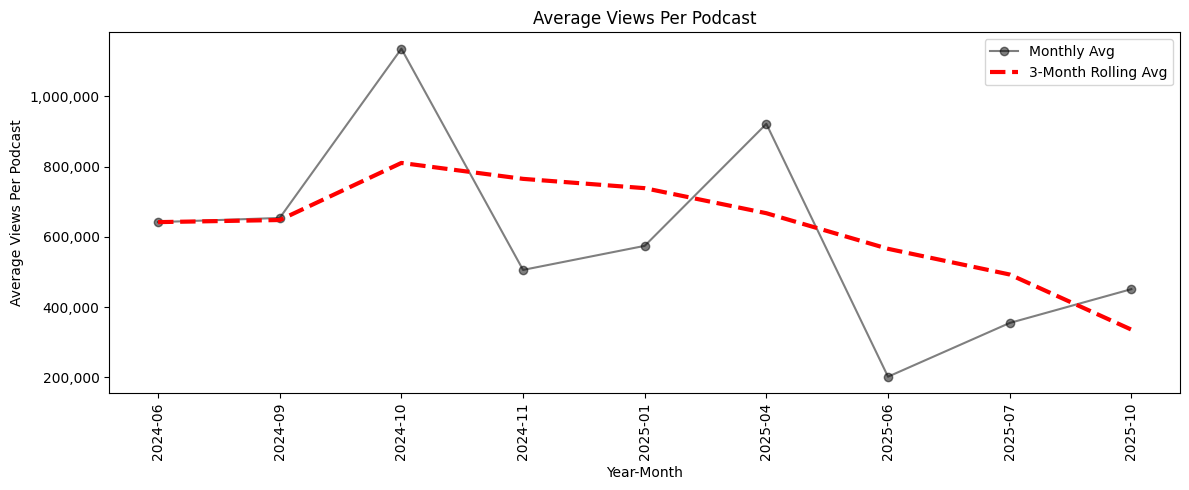

In [250]:
ym_views['views_3mo_roll'] = ym_views['avg_views_per_video'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(ym_views['year_month'], ym_views['avg_views_per_video'],
         marker='o', alpha=0.5, label='Monthly Avg', color='black')
plt.plot(ym_views['year_month'], ym_views['views_3mo_roll'],
         linestyle='--', linewidth=3, color='red', label='3-Month Rolling Avg')

plt.title("Average Views Per Podcast")
plt.xlabel("Year-Month")
plt.ylabel("Average Views Per Podcast")
plt.xticks(rotation=90)
plt.legend()

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

### Total views across year and month

In [205]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['month_name'] = df['published_date'].dt.month_name()

In [206]:
all_months = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

pivot_views = df.pivot_table(
    values='view_count',
    index='year',
    columns='month_name',
    aggfunc='sum'
).reindex(columns=all_months, fill_value=0)

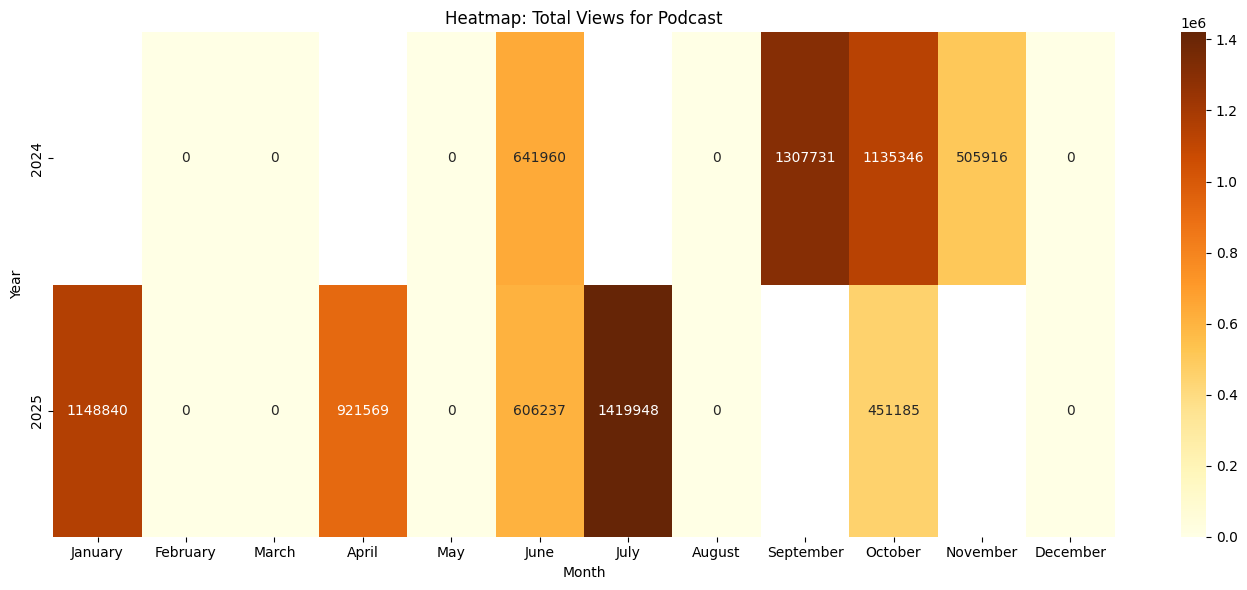

In [221]:
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_views, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Heatmap: Total Views for Podcast")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

### Average views per video

In [208]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['year'] = df['published_date'].dt.year
df['month_name'] = df['published_date'].dt.month_name()

In [209]:
avg_views = df.groupby(['year', 'month_name']).agg(
    total_views=('view_count', 'sum'),
    n_videos=('title', 'count')
).reset_index()

avg_views['avg_views_per_video'] = avg_views['total_views'] / avg_views['n_videos']

In [210]:
all_months = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

pivot_avg_views = avg_views.pivot_table(
    values='avg_views_per_video',
    index='year',
    columns='month_name'
).reindex(columns=all_months, fill_value=0)

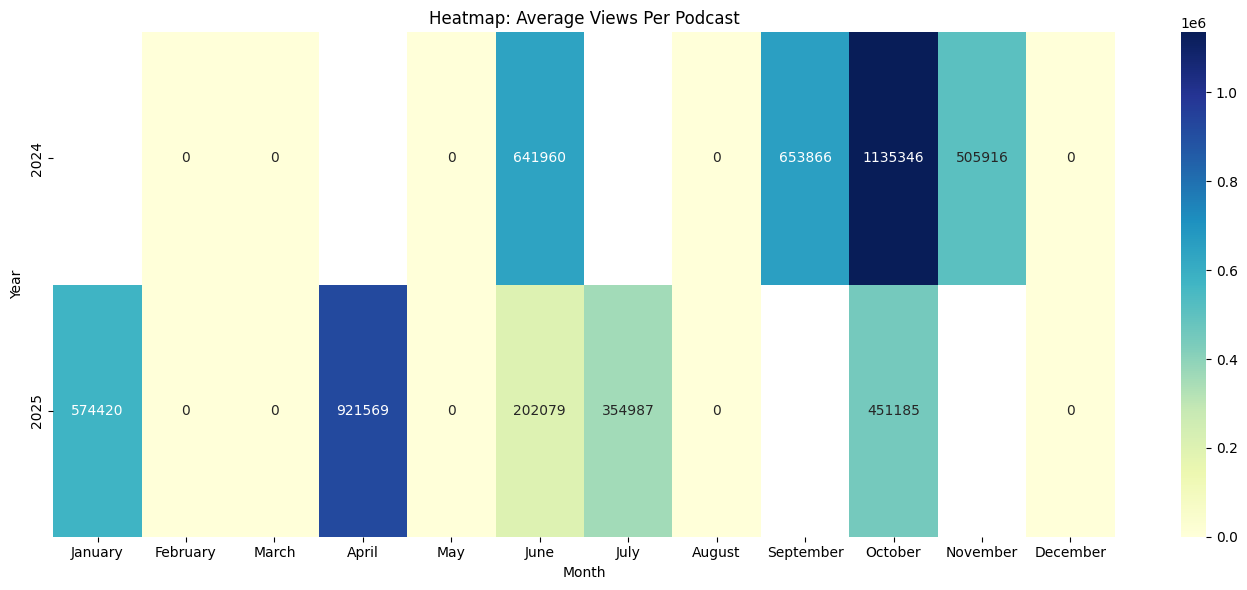

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_avg_views, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap: Average Views Per Podcast")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

### Average views 

In [214]:
df['view_count'].mean()

np.float64(508670.75)

### Top 5 podcasts by views

In [216]:
top5 = df.nlargest(5, 'view_count')
cols = ['video_id','title','published_date','view_count','like_count','comment_count','duration','total_seconds']
cols = [c for c in cols if c in top5.columns]

In [217]:
display(top5[cols].reset_index(drop=True))

,title,published_date,view_count,like_count,comment_count,total_seconds
0,Boult's SHOCKING Move to Dominate the Wearable...,2024-10-03,1135346,14138,663,6521
1,Ultimate AI Masterclass for Founders and Execu...,2025-04-05,921569,23322,871,6040
2,The shocking Solar Goldmine that is Making Ind...,2025-01-17,867058,12558,1285,4998
3,The Surprising Reason VEEBA is Conquering the ...,2024-09-15,761910,11305,563,7714
4,How to build a Real Estate Empire? : Niranjan ...,2024-06-11,641960,11366,448,4362


In [219]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month_name()
monthly_uploads = df.groupby(['year', 'month']).size().reset_index(name='upload_count')
monthly_uploads

,year,month,upload_count
0,2024,June,1
1,2024,November,1
2,2024,October,1
3,2024,September,2
4,2025,April,1
5,2025,January,2
6,2025,July,4
7,2025,June,3
8,2025,October,1


In [222]:
df.shape

(16, 15)

In [224]:
df['published_date'].min()

Timestamp('2024-06-11 00:00:00')

In [225]:
df['published_date'].max()

Timestamp('2025-10-01 00:00:00')

In [226]:
df.head()

,title,view_count,like_count,comment_count,hours,minutes,seconds,total_seconds,duration_minutes,published_date,duration_bin,year,month,month_name,year_month
0,The $4 Trillion GDP Is a Lie? | Why Our $4 Tri...,451185,11351,1475,1,28,4,5284,88.066667,2025-10-01,Upto 1 hour 30 minutes,2025,October,October,2025-10
1,@OpenAI VP on How AI Will Redefine Work ft. Sr...,280004,4525,226,1,1,9,3669,61.150000,2025-07-31,Upto 1 hour 30 minutes,2025,July,July,2025-07
2,10X Your BUSINESS and Build POWERFUL Career: K...,335307,7218,365,1,32,15,5535,92.250000,2025-07-26,Upto 2 hours,2025,July,July,2025-07
3,Dark Truth of Gurgaon Real Estate Ft. Vishal B...,499452,7148,1113,2,1,37,7297,121.616667,2025-07-21,Upto 2 hours 30 minutes,2025,July,July,2025-07
4,Ex-Facebook & Uber Heads Reveal 9 SIMPLE HABIT...,305185,6062,197,1,56,18,6978,116.300000,2025-07-11,Upto 2 hours,2025,July,July,2025-07


### Average Duration

In [227]:
df['total_seconds'].mean()

np.float64(6722.3125)

In [228]:
6722.3125/60

112.03854166666666

In [229]:
112/60

1.8666666666666667

### Average views

In [230]:
df['view_count'].mean()

np.float64(508670.75)

### Average likes

In [231]:
df['like_count'].mean()

np.float64(9114.0625)

### Total views

In [232]:
df['view_count'].sum()

np.int64(8138732)

### Total watch

In [233]:
df['total_seconds'].sum()

np.int64(107557)

In [234]:
107557/60

1792.6166666666666

### Average monthly upload frequency

In [235]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [236]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month_name()
df['week'] = df['published_date'].dt.isocalendar().week
df['day']  = df['published_date'].dt.date

In [237]:
uploads_per_month = df.groupby(['year','month']).size().reset_index(name='upload_count')
uploads_per_month

,year,month,upload_count
0,2024,June,1
1,2024,November,1
2,2024,October,1
3,2024,September,2
4,2025,April,1
5,2025,January,2
6,2025,July,4
7,2025,June,3
8,2025,October,1


In [238]:
uploads_per_year = df.groupby('year').size().reset_index(name='upload_count')
uploads_per_year

,year,upload_count
0,2024,5
1,2025,11


In [239]:
uploads_per_week = df.groupby(['year','week']).size().reset_index(name='upload_count')
uploads_per_week

,year,week,upload_count
0,2024,24,1
1,2024,37,1
2,2024,39,1
3,2024,40,1
4,2024,47,1
5,2025,2,1
6,2025,3,1
7,2025,14,1
8,2025,23,2
9,2025,26,1


In [240]:
uploads_per_day = df.groupby('day').size().reset_index(name='upload_count')
uploads_per_day

,day,upload_count
0,2024-06-11,1
1,2024-09-15,1
2,2024-09-26,1
3,2024-10-03,1
4,2024-11-21,1
5,2025-01-07,1
6,2025-01-17,1
7,2025-04-05,1
8,2025-06-02,1
9,2025-06-07,1


In [241]:
avg_monthly_uploads = uploads_per_month['upload_count'].mean()
avg_monthly_uploads

np.float64(1.7777777777777777)

In [242]:
avg_weekly_uploads = uploads_per_week['upload_count'].mean()
avg_weekly_uploads

np.float64(1.1428571428571428)

### Distribution of duration

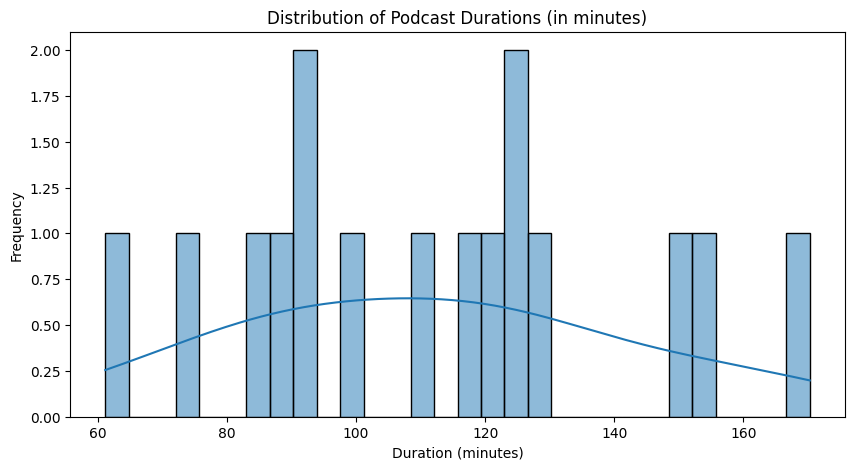

In [245]:
plt.figure(figsize=(10,5))
sns.histplot(df['duration_minutes'], bins=30, kde=True)
plt.title("Distribution of Podcast Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

### Distribution of Views

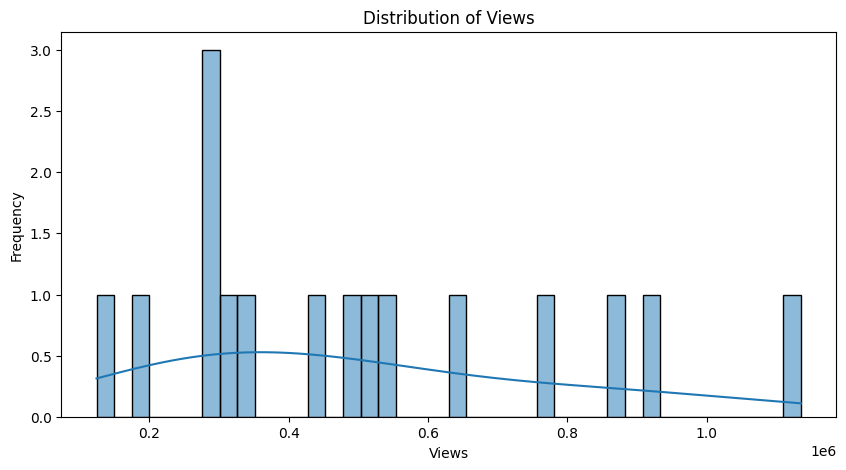

In [247]:
plt.figure(figsize=(10,5))
sns.histplot(df['view_count'], bins=40, kde=True)
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

### Histogram of likes

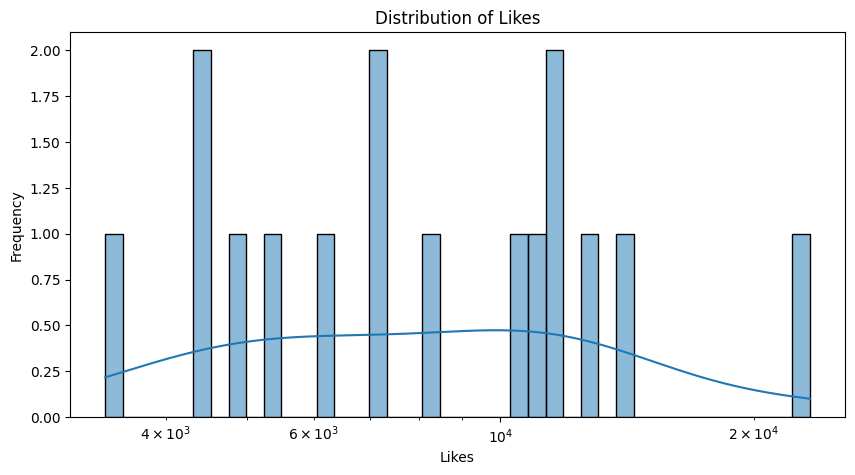

In [248]:
plt.figure(figsize=(10,5))
sns.histplot(df['like_count'], bins=40, kde=True, log_scale=True)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

### Corelation Heatmap

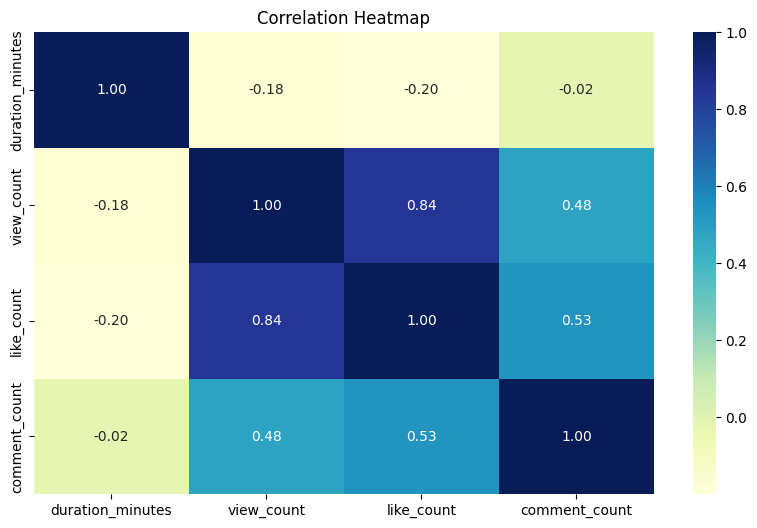

In [249]:
plt.figure(figsize=(10,6))
corr_matrix = df[['duration_minutes', 'view_count', 'like_count', 'comment_count']].corr()

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Top 5 podcasts by likes

In [252]:
top5 = df.nlargest(5, 'like_count')
cols = ['video_id','title','published_date','view_count','like_count','comment_count','duration','total_seconds']
cols = [c for c in cols if c in top5.columns]

In [253]:
display(top5[cols].reset_index(drop=True))

,title,published_date,view_count,like_count,comment_count,total_seconds
0,Ultimate AI Masterclass for Founders and Execu...,2025-04-05,921569,23322,871,6040
1,Boult's SHOCKING Move to Dominate the Wearable...,2024-10-03,1135346,14138,663,6521
2,The shocking Solar Goldmine that is Making Ind...,2025-01-17,867058,12558,1285,4998
3,How to build a Real Estate Empire? : Niranjan ...,2024-06-11,641960,11366,448,4362
4,The $4 Trillion GDP Is a Lie? | Why Our $4 Tri...,2025-10-01,451185,11351,1475,5284


### Best podcast by views

In [255]:
best_podcast = df.loc[df['view_count'].idxmax()]

In [256]:
best_podcast

title               Boult's SHOCKING Move to Dominate the Wearable...
view_count                                                    1135346
like_count                                                      14138
comment_count                                                     663
hours                                                               1
minutes                                                            48
seconds                                                            41
total_seconds                                                    6521
duration_minutes                                           108.683333
published_date                                    2024-10-03 00:00:00
duration_bin                                             Upto 2 hours
year                                                             2024
month                                                         October
month_name                                                    October
year_month          

### Likes ratio

In [258]:
avg_likes = df['like_count'].mean()
avg_likes

np.float64(9114.0625)

In [259]:
avg_views = df['view_count'].mean()
avg_views

np.float64(508670.75)

In [260]:
likes_ratio = avg_likes/avg_views
likes_ratio

np.float64(0.01791741023048799)

### Comments ratio

In [261]:
avg_comments = df['comment_count'].mean()
avg_comments

np.float64(630.4375)

In [262]:
comments_ratio = avg_comments/avg_views
comments_ratio

np.float64(0.001239382252665403)